# Python Lab

## Basic Arithmetic Operations
This cell demonstrates basic addition of two integers.

## Integer Interning in Python

Python uses **integer interning** (also called **integer caching**) as a memory optimization technique. For small integers in the range of -5 to 256, Python pre-creates and reuses the same integer objects rather than creating new ones each time.

This means when you assign the same small integer value to different variables, they actually reference the same object in memory, which is why `id(a)` and `id(b)` return identical memory addresses.

This optimization:

- Reduces memory usage
- Improves performance for frequently used small integers
- Is completely transparent to the programmer

In [78]:
a = 5
b = 3
print(a + b)

8


In [79]:
a = 5
b = 5
print(id(a), id(b))

4341137776 4341137776


## List Identity vs Equality

This cell demonstrates the difference between identity (`is`) and equality (`==`) with lists. Unlike small integers, lists are **not** interned in Python. Even when two lists have identical contents, they are separate objects in memory with different `id()` values. The `==` operator checks if values are equal, while `is` checks if they are the same object.

In [80]:
a = [1, 2, 3]
b = [1, 2, 3]
print(id(a), id(b))
print(a == b)
print(a is b)

4597218432 4597218496
True
False


## Mutable Objects in Python

Lists are **mutable objects**, meaning their contents can be modified after creation without changing their identity (memory address). This cell demonstrates how using `append()` modifies the list in-place - the `id()` remains the same before and after modification, proving it's the same object with changed contents.

In [81]:
b = [1, 2, 3]
print("Before append:")
print("b =", b)
print("id(b) =", id(b))

b.append(4)
print("\nAfter append:")
print("b =", b)
print("id(b) =", id(b))

Before append:
b = [1, 2, 3]
id(b) = 4597218240

After append:
b = [1, 2, 3, 4]
id(b) = 4597218240


## Copying Lists

This cell demonstrates different ways to create copies of lists in Python.

In [82]:
# Cách 1: Dùng slicing
a = [1, 2, 3]
b = a[:]   # tạo bản sao nông (shallow copy)
b.append(4)
print(a, b)

# Cách 2: Dùng list()
a = [1, 2, 3]
b = list(a)
b.append(4)
print(a, b)

# Cách 3: Dùng thư viện copy
import copy
a = [1, 2, [10, 20]]
b = copy.deepcopy(a)  # tạo bản sao sâu (deep copy)
b[2].append(30)
print(a, b)

[1, 2, 3] [1, 2, 3, 4]
[1, 2, 3] [1, 2, 3, 4]
[1, 2, [10, 20]] [1, 2, [10, 20, 30]]


## Visualizing the Difference: Shallow vs Deep Copy

This example clearly demonstrates the behavior difference between `copy.copy()` (shallow) and `copy.deepcopy()` (deep):

- **Variable `a`**: Original list with a nested list `[2, 3]`
- **Variable `b`**: Shallow copy - creates a new outer list, but shares the nested list with `a`
  - When we do `b[1].append(4)`, it modifies the shared nested list
  - Both `a` and `b` show `[2, 3, 4]` because they point to the same nested list object
- **Variable `c`**: Deep copy - creates completely independent copies at all levels
  - When we do `c[1].append(5)`, it only modifies `c`'s own nested list
  - `a` and `b` are unaffected

**Result**: This proves shallow copy shares nested objects while deep copy creates truly independent copies.

In [83]:
import copy

a = [1, [2, 3]]
b = copy.copy(a)      # shallow copy
c = copy.deepcopy(a)  # deep copy

b[1].append(4)
c[1].append(5)

print("a:", a)
print("b:", b)
print("c:", c)

a: [1, [2, 3, 4]]
b: [1, [2, 3, 4]]
c: [1, [2, 3, 5]]


# Data Structures in Python - Lists

Python's **list** is one of the most versatile data structures. Lists are:

- **Ordered**: Elements maintain their position
- **Mutable**: Can be modified after creation
- **Dynamic**: Can grow or shrink in size
- **Heterogeneous**: Can contain different data types

This cell demonstrates fundamental list operations: indexing to access elements and `append()` to add elements.

In [84]:
nums = [10, 20, 30]
print(nums[0])
nums.append(40)
print(nums)

10
[10, 20, 30, 40]


List can have different data type elements

In [85]:
nums = [10, "AI", [1, 2, 3], True]

In [86]:
nums = [1, 2, 3, 4]
for x in nums:
    print(x * 2)

2
4
6
8


Another **list comprehension**

In [87]:
nums = [1, 2, 3, 4]
doubles = [x * 2 for x in nums]
print(doubles)

[2, 4, 6, 8]


In [88]:
matrix = [[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]

flattened = [x for row in matrix for x in row]
print(flattened)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


Create an array *nums* contains element from 1 to 10. And create another array *squares* based on *num* with square operator if element is even:

In [89]:
nums = list(range(1,10))
squares = [n**2 for n in nums if n % 2 == 0]
print(squares)

[4, 16, 36, 64]


## Note: The `range()` Function and Lazy Evaluation

The `range()` function creates an **iterable** that generates numbers on-demand using **lazy evaluation**:

- **Lazy Evaluation**: Values are generated only when needed, not all at once
- **Memory Efficient**: `range(1000000)` doesn't create a list of 1 million numbers in memory
- **Iterable**: Can be used in loops, converted to lists with `list()`, or consumed by other functions
- **Immutable**: The range object itself cannot be modified

Example: `range(1, 10)` creates an iterable that will produce numbers 1 through 9 when iterated over, but the numbers aren't generated until you actually use them (like in a loop or when converting to a list with `list(range(1, 10))`).

This is a key performance optimization in Python, especially when working with large sequences.

# NumPy

## Introduction to NumPy Arrays

**NumPy** (Numerical Python) is a fundamental library for scientific computing in Python. This cell demonstrates creating a NumPy array using `np.array()`:

- NumPy arrays are more efficient than Python lists for numerical operations
- The type `numpy.ndarray` (n-dimensional array) is the core data structure
- Arrays are homogeneous - all elements must be the same type
- Ideal for mathematical and scientific computations

In [90]:
import numpy as np

arr = np.array([1, 2, 3, 4, 5])
print(arr)
print(type(arr))

[1 2 3 4 5]
<class 'numpy.ndarray'>


## Vectorized Operations in NumPy

This demonstrates **vectorization** - one of NumPy's most powerful features:

- Operations are applied to entire arrays at once, not element-by-element
- `arr + 10` adds 10 to every element without needing a loop
- Much faster than iterating through Python lists
- Makes code cleaner and more readable
- NumPy operations are implemented in C, providing significant performance gains

In [91]:
arr = np.array([1, 2, 3, 4, 5])
print(arr + 10)

[11 12 13 14 15]


In [92]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print(a + b)
print(a * b)
print(np.dot(a, b))

[5 7 9]
[ 4 10 18]
32


## Matrix Multiplication: `@` Operator vs Element-wise Operations

This cell demonstrates the `@` operator for **matrix multiplication**, which is fundamentally different from element-wise operations:

### The `@` Operator - Matrix Multiplication

- Performs **linear algebra matrix multiplication** (dot product)
- Each element in the result is the sum of products of corresponding row and column elements
- Formula: `(A @ B)[i,j] = sum of (A[i,k] * B[k,j])` for all k
- **Calculation example from this cell**:

  - `Result[0,0] = (1×5) + (2×7) = 5 + 14 = 19`
  - `Result[0,1] = (1×6) + (2×8) = 6 + 16 = 22`
  - `Result[1,0] = (3×5) + (4×7) = 15 + 28 = 43`
  - `Result[1,1] = (3×6) + (4×8) = 18 + 32 = 50`

### Element-wise Operations (`*`, `+`, `-`, `/`)

- `A * B` multiplies corresponding elements: `Result[i,j] = A[i,j] * B[i,j]`
- Example: `[[1,2],[3,4]] * [[5,6],[7,8]] = [[1*5, 2*6],[3*7, 4*8]] = [[5,12],[21,32]]`
- Simple position-by-position operation, no cross-element computation

**Key Difference**: `@` combines multiple elements (row × column), while `*` operates on single pairs of elements.

In [93]:
A = np.array([[1, 2],
              [3, 4]])

B = np.array([[5, 6],
              [7, 8]])

print(A @ B)


[[19 22]
 [43 50]]


## NumPy Broadcasting Rules

**Broadcasting** is NumPy's powerful mechanism for performing operations on arrays of different shapes. Instead of requiring arrays to have identical dimensions, NumPy automatically "broadcasts" smaller arrays to match larger ones.

### Example 1: Adding a 1D array to a 2D matrix

This cell shows `A` (shape 2×2) + `b` (shape 2):

- `A` is `[[1,2], [3,4]]` (2×2 matrix)
- `b` is `[1, 2]` (1D array with 2 elements)
- NumPy broadcasts `b` to each row of `A`
- Equivalent to: `[[1,2], [3,4]] + [[1,2], [1,2]]`
- Result: `[[2,4], [4,6]]`

**Broadcasting rule applied**: The 1D array `b` is replicated along the missing dimension (rows) to match the 2D matrix shape.

In [94]:
A = np.array([[1, 2],
              [3, 4]])
b = np.array([1, 2])
print(A + b)

[[2 4]
 [4 6]]


### Example 2: Broadcasting with different dimension combinations

This cell shows `A` (shape 3×1) + `b` (shape 3):
- `A` is `[[1], [2], [3]]` (3×1 column vector)
- `b` is `[10, 20, 30]` (1×3 row vector)
- NumPy broadcasts both arrays to shape 3×3:
  - `A` is replicated horizontally across columns
  - `b` is replicated vertically down rows
- Equivalent to: `[[1,1,1], [2,2,2], [3,3,3]] + [[10,20,30], [10,20,30], [10,20,30]]`
- Result: `[[11,21,31], [12,22,32], [13,23,33]]`

**Key Broadcasting Rules**:

1. Arrays with fewer dimensions are padded with 1s on the left
2. Dimensions of size 1 are stretched to match the other array
3. If dimensions don't match and neither is 1, an error occurs

Broadcasting makes code more efficient and readable by eliminating the need for explicit loops or array replication.

In [95]:
A = np.array([[1],
              [2],
              [3]])
b = np.array([10, 20, 30])
print(A + b)

[[11 21 31]
 [12 22 32]
 [13 23 33]]


## Matrix Multiplication with Different Shapes

This cell demonstrates matrix multiplication with non-square matrices and how to determine the resulting shape:

### Matrix Dimensions and Multiplication Rules

- **Matrix A**: shape (2, 3) - 2 rows, 3 columns
- **Matrix B**: shape (3, 2) - 3 rows, 2 columns
- **Result C = A @ B**: shape (2, 2) - 2 rows, 2 columns

### Key Rule for Matrix Multiplication

For `A @ B` to be valid:

- **Number of columns in A must equal number of rows in B**
- In this case: A has 3 columns, B has 3 rows ✓ Valid
- **Resulting shape**: (A's rows, B's columns) = (2, 2)

### Calculation Example

- `C[0,0] = (1×1) + (2×3) + (3×5) = 1 + 6 + 15 = 22`
- `C[0,1] = (1×2) + (2×4) + (3×6) = 2 + 8 + 18 = 28`
- `C[1,0] = (4×1) + (5×3) + (6×5) = 4 + 15 + 30 = 49`
- `C[1,1] = (4×2) + (5×4) + (6×6) = 8 + 20 + 36 = 64`

The `.shape` attribute shows the dimensions of the resulting array.

In [96]:
import numpy as np

A = np.array([[1, 2, 3],
              [4, 5, 6]])

B = np.array([[1, 2],
              [3, 4],
              [5, 6]])

C = A @ B
print(C)
print(C.shape)

[[22 28]
 [49 64]]
(2, 2)


## Matrix Inverse

This cell demonstrates computing the **inverse matrix** using `np.linalg.inv()`:

### What is a Matrix Inverse?
The inverse of matrix A (denoted A⁻¹) is a matrix that, when multiplied with A, produces the **identity matrix** (I):

- **Property**: A @ A⁻¹ = I (identity matrix)
- **Identity matrix**: A matrix with 1s on the diagonal and 0s elsewhere

### Example from this cell

- **Original matrix A**: `[[1, 2], [3, 4]]`
- **Inverse matrix A⁻¹**: `[[-2.0, 1.0], [1.5, -0.5]]`
- **Verification A @ A⁻¹**: Results in `[[1, 0], [0, 1]]` (identity matrix)

### Important Notes

1. **Only square matrices** can have an inverse (same number of rows and columns)
2. **Not all square matrices are invertible** - the determinant must be non-zero
3. **Floating-point precision**: Notice `8.88e-16` instead of exact `0` - this is due to floating-point arithmetic limitations
4. **Applications**: Solving systems of linear equations, transformations in computer graphics, etc.

The tiny value `8.88e-16` is essentially zero (within numerical precision), confirming that A @ A⁻¹ = I.

In [97]:
A = np.array([[1, 2],
              [3, 4]])

invA = np.linalg.inv(A)
print(invA)
print(A @ invA)

[[-2.   1. ]
 [ 1.5 -0.5]]
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


## Solving Linear Systems: `np.linalg.solve()`

This cell demonstrates solving a **system of linear equations** using `np.linalg.solve()`, which is the most efficient and accurate method.

### The Problem: Ax = b
We need to find the unknown vector **x** that satisfies **Ax = b**, where:

- **A** = coefficient matrix `[[3, 1], [1, 2]]`
- **b** = result vector `[9, 8]`
- **x** = unknown values we're solving for `[x, y]`

### What This Represents
This solves the system of equations:

- Equation 1: **3x + 1y = 9**
- Equation 2: **1x + 2y = 8**

### Why Use `solve()` Instead of Matrix Inverse?

While mathematically x = A⁻¹ @ b, using `np.linalg.solve(A, b)` is superior:

1. **Computationally efficient**: Doesn't actually compute the inverse
2. **Numerically stable**: Uses LU decomposition internally
3. **More accurate**: Avoids accumulation of floating-point errors
4. **Better for large systems**: Scales better for bigger matrices

### Verification of Result

The solution `[2. 3.]` means x=2, y=3. We can verify:

- 3(2) + 1(3) = 6 + 3 = 9 ✓
- 1(2) + 2(3) = 2 + 6 = 8 ✓

In [98]:
import numpy as np

A = np.array([[3, 1],
              [1, 2]])

b = np.array([9, 8])

x = np.linalg.solve(A, b)
print(x)

[2. 3.]


## Important Note: Singular Matrices

### What Happens When det(A) = 0?

If the determinant of matrix A is zero, `np.linalg.solve()` will raise a **LinAlgError: Singular matrix** error.

### Why Does This Happen?

A **singular matrix** (determinant = 0) means:

- The matrix is **not invertible** (has no inverse)
- The system of equations has either:
  - **No solution** (equations are inconsistent)
  - **Infinitely many solutions** (equations are dependent/redundant)

### Example of a Singular Matrix

```python
A_singular = np.array([[2, 4],
                       [1, 2]])  # Second row is first row × 0.5
b = np.array([6, 3])

# This will raise: LinAlgError: Singular matrix
# x = np.linalg.solve(A_singular, b)
```

The equations 2x + 4y = 6 and 1x + 2y = 3 are actually the same equation (the second is just the first divided by 2), so there are infinitely many solutions.

### How to Check Before Solving

Always check if det(A) ≠ 0 before using `solve()`:

```python
det_A = np.linalg.det(A)
if abs(det_A) < 1e-10:  # Close to zero
    print("Warning: Matrix is singular or nearly singular")
else:
    x = np.linalg.solve(A, b)
```

# Regression Sample

## Generating Sample Data for Linear Regression

This cell creates synthetic data for demonstrating linear regression, simulating a real-world scenario where observations have noise.

### The Data Generation Process

1. **Random Number Generator**: `np.random.default_rng(42)`
   - Creates a random number generator with seed 42
   - Using a fixed seed ensures **reproducibility** - same results every time

2. **Sample Size**: `n = 50`
   - We generate 50 data points

3. **Independent Variable (x)**: `rng.uniform(-3, 3, size=n)`
   - Generates 50 random values uniformly distributed between -3 and 3
   - These are our input/predictor values

4. **Random Noise**: `rng.normal(0, 0.8, size=n)`
   - Generates 50 random values from a normal (Gaussian) distribution
   - Mean = 0, Standard deviation = 0.8
   - Simulates measurement errors or natural variability in real data

5. **Dependent Variable (y)**: `y = 3*x + 2 + noise`
   - **True relationship**: y = 3x + 2 (slope=3, intercept=2)
   - We add noise to make it realistic
   - In regression, we'll try to recover these true parameters from the noisy data

This synthetic dataset mimics real-world scenarios where we observe data with inherent noise and want to find the underlying linear relationship.

In [99]:
import numpy as np
rng = np.random.default_rng(42)
n = 50
x = rng.uniform(-3, 3, size=n)
noise = rng.normal(0, 0.8, size=n)
y = 3*x + 2 + noise

## Inspecting the Generated Data

Let's examine the data we created and visualize the relationship between x and y to see how the noise affects the linear pattern.

Number of samples: 50
x range: [-2.74, 2.85]
y range: [-6.47, 10.46]

First 5 samples:
x: [ 1.64373629 -0.36672936  2.15158752  1.18420817 -2.43493591]
y: [ 7.47433972  0.95387517  8.68605808  6.0576551  -6.47053239]


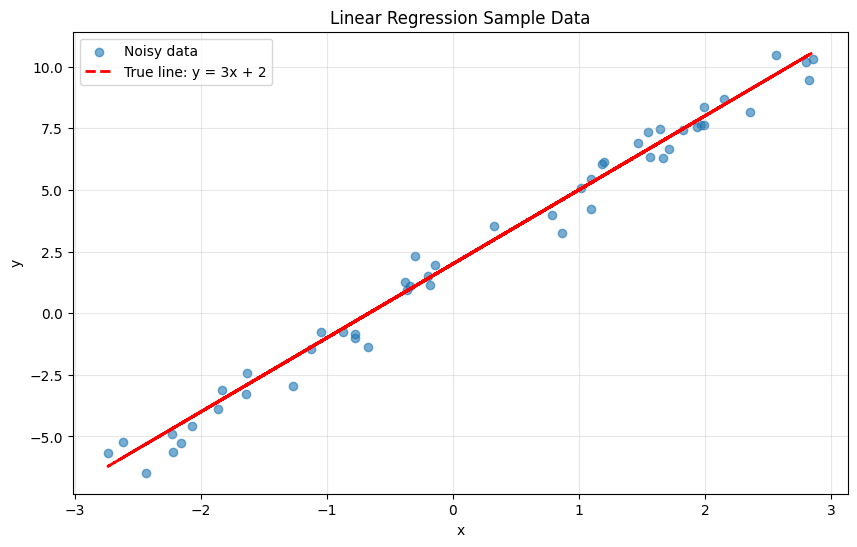

In [100]:
# Install matplotlib if not available
import sys
import subprocess
try:
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    print("Installing matplotlib...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib"])
    import matplotlib.pyplot as plt

# Display basic statistics
print(f"Number of samples: {n}")
print(f"x range: [{x.min():.2f}, {x.max():.2f}]")
print(f"y range: [{y.min():.2f}, {y.max():.2f}]")
print(f"\nFirst 5 samples:")
print(f"x: {x[:5]}")
print(f"y: {y[:5]}")

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, label='Noisy data')
plt.plot(x, 3*x + 2, 'r--', label='True line: y = 3x + 2', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Sample Data')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Linear Regression Using Least Squares Method

This cell implements **linear regression** from scratch using the **least squares** formula to find the best-fit line for our noisy data.

### The Goal
Find the line **y = mx + b** that best fits our data by minimizing the sum of squared errors between predicted and actual y values.

### The Mathematics

For linear regression with intercept, we use matrix form:

- **Design matrix X**: Each row is `[1, x_i]` where the 1 is for the intercept term
- **Parameters w**: `[b, m]` where b is intercept, m is slope
- **Least squares formula**: `w = (X^T X)^(-1) X^T y`

### Step-by-Step Process

1. **Build design matrix X**: `np.c_[np.ones_like(x), x]`
   - Column 1: All ones (for intercept b)
   - Column 2: The x values (for slope m)
   - Shape: (n, 2)

2. **Compute X^T X**: Matrix multiplication of transpose of X with X

3. **Compute inverse**: `(X^T X)^(-1)` 

4. **Compute X^T y**: Transpose of X multiplied by y vector

5. **Final solution**: `w = (X^T X)^(-1) X^T y`

### Why This Works
The least squares method finds parameters that minimize the **sum of squared residuals** (errors). This is the optimal solution when errors follow a normal distribution.

### Expected Result
Since we generated data with y = 3x + 2 + noise, we expect:

- Slope (m) ≈ 3
- Intercept (b) ≈ 2

The values won't be exact due to the random noise we added.

In [102]:
# Giả sử ta đã có x, y từ bước 1
import numpy as np

# X là ma trận có 2 cột:
#   - cột 1: toàn 1 (cho hệ số chặn b)
#   - cột 2: giá trị x
X = np.c_[np.ones_like(x), x]   # shape (n, 2)

# Công thức bình phương tối thiểu (least squares):
# w = (X^T X)^(-1) X^T y
XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
XtY = X.T @ y
w = XtX_inv @ XtY

b, m = w
print("b (intercept) =", b)
print("m (slope)     =", m)

b (intercept) = 1.8632311896955387
m (slope)     = 3.016101347688831


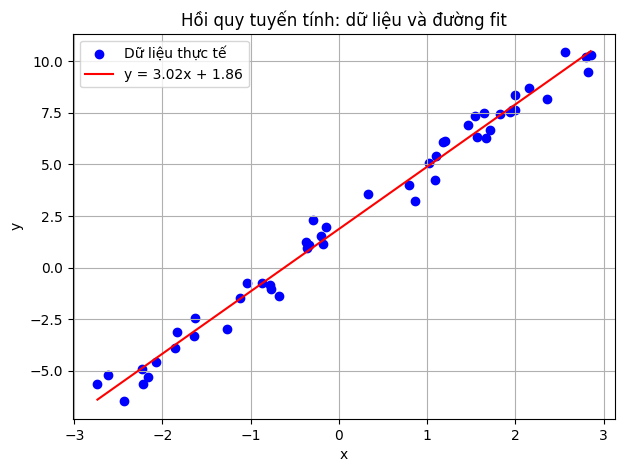

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Giả sử ta vẫn có x, y, b, m từ phần trước

plt.figure(figsize=(7,5))

# Vẽ các điểm dữ liệu thật (x, y)
plt.scatter(x, y, color='blue', label='Dữ liệu thực tế')

# Tạo 100 điểm x mịn để vẽ đường hồi quy
x_line = np.linspace(min(x), max(x), 100)
y_line = m * x_line + b

# Vẽ đường hồi quy
plt.plot(x_line, y_line, color='red', label=f'y = {m:.2f}x + {b:.2f}')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Hồi quy tuyến tính: dữ liệu và đường fit")
plt.legend()
plt.grid(True)
plt.show()

## Evaluating Model Performance: Error Metrics

This cell calculates error metrics to evaluate how well our linear regression model fits the data.

### Predictions

- **y_hat**: Predicted values using our model `y_hat = mx + b`
- These are what our model predicts for each x value

### Error Metrics

**1. MAE (Mean Absolute Error)**

- Formula: `MAE = mean(|y - y_hat|)`
- Takes the average of absolute differences between actual and predicted values
- Interpretation: On average, how far off are our predictions?
- Advantage: Easy to interpret - same units as y
- Use case: When you want to understand typical prediction error

**2. RMSE (Root Mean Squared Error)**

- Formula: `RMSE = sqrt(mean((y - y_hat)²))`
- Takes the square root of the average squared errors
- Penalizes large errors more than MAE due to squaring
- Advantage: More sensitive to **outliers**
- Use case: When large errors are particularly undesirable

### Comparison

- RMSE ≥ MAE (always true)
- If RMSE >> MAE: Model has some large errors (outliers)
- If RMSE ≈ MAE: Errors are relatively uniform

### Expected Results

Since we added noise with std=0.8, we expect errors around that magnitude. Lower values indicate a better fit to the data.

In [104]:
# Dự đoán giá trị y từ mô hình
y_hat = m * x + b

# Sai số tuyệt đối trung bình (Mean Absolute Error)
mae = np.mean(np.abs(y - y_hat))

# Sai số bình phương trung bình (Root Mean Squared Error)
rmse = np.sqrt(np.mean((y - y_hat)**2))

print("MAE  =", mae)
print("RMSE =", rmse)

MAE  = 0.5031290627410547
RMSE = 0.605827185639896
